<a href="https://colab.research.google.com/github/gabrielasarria/Lina-Flor/blob/main/semana2/Lina_Flor_Ejercicio_LimpiezaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [1]:
# Cargar el dataset DailyDelhiClimateTrain.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/DailyDelhiClimateTrain (1).csv', header = 0)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal

data.tail()


,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [3]:
data.dtypes

,0
date,object
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [4]:
data.count()

,0
date,1462
meantemp,1462
humidity,1462
wind_speed,1462
meanpressure,1462


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data.drop(columns = ['meantemp','humidity', 'wind_speed'], inplace=True)
data.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


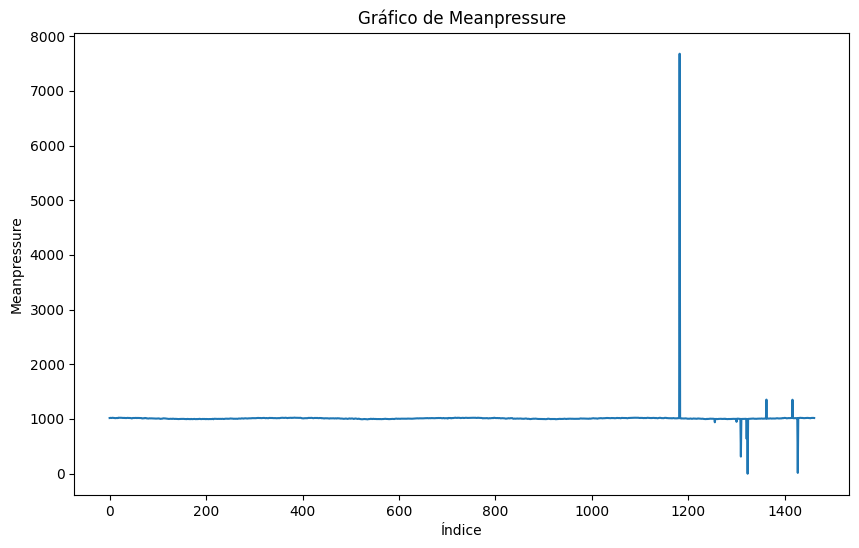

In [35]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?

  # la presión atmosférica media en el conjunto de datos tiende a estar alrededor de 1010 Pascales, con una dispersión moderada y una ligera asimetría a la derecha

# Hay algo atípico en esa respuesta temporal?

#Si, se puede ver que hay varios en el extremo superior de la distribución.


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['meanpressure'])
plt.xlabel('Índice')
plt.ylabel('Meanpressure')
plt.title('Gráfico de Meanpressure')
plt.show()



<Axes: ylabel='meanpressure'>

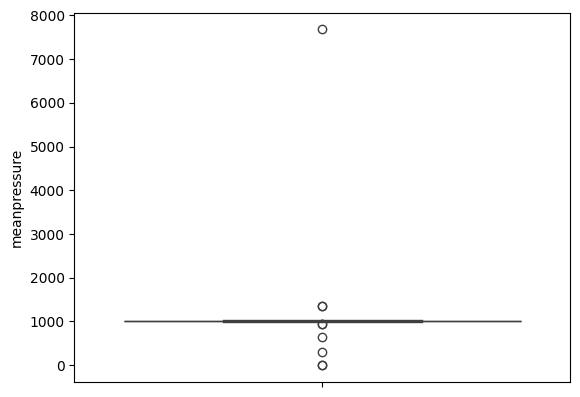

In [12]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data = data['meanpressure'])


In [24]:
# Calcular el parámetro Zscore para la columna meanpressure
Zscore = np.abs(stats.zscore(data.loc[:,['meanpressure']]) )
index, flag = np.where(Zscore > 3)
print(index)
print(flag)

[1182 1309 1323 1427]
[0 0 0 0]


In [28]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
Zscore = np.abs(stats.zscore(data.loc[:,['meanpressure']]) )
index, flag = np.where(Zscore > 0.1)
print(index)
print(flag)

[ 535 1182 1255 1300 1309 1321 1323 1362 1416 1427]
[0 0 0 0 0 0 0 0 0 0]


In [29]:
data_out = data [(Zscore < 0.1).all(axis=1)]
data_out.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [30]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
#  ya hay un min y un maximo mucho mayor al anterior y mas corelacionado.
data_out.describe()

,meanpressure
count,1452.000000
mean,1008.280653
std,7.427159
min,993.125000
25%,1001.625000
50%,1008.585714
75%,1014.939967
max,1023.000000


<Axes: ylabel='meanpressure'>

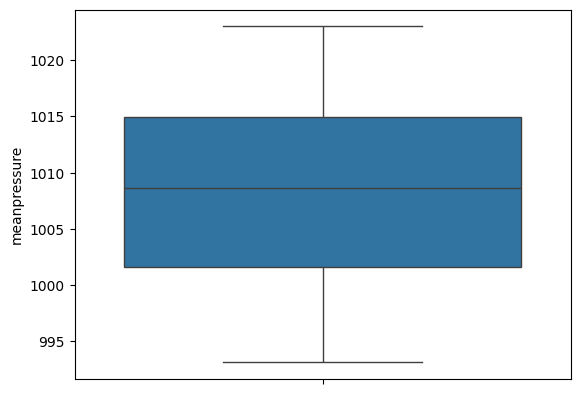

In [31]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data = data_out['meanpressure'])

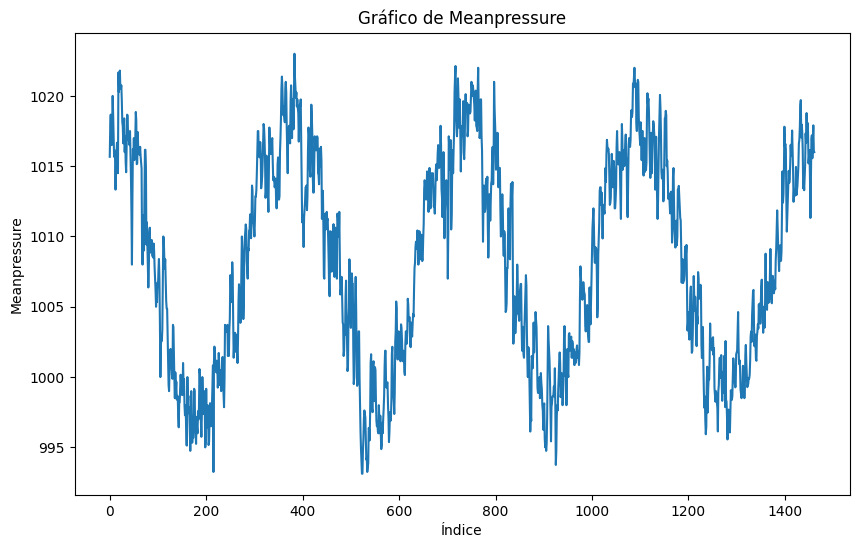

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data_out['meanpressure'])
plt.xlabel('Índice')
plt.ylabel('Meanpressure')
plt.title('Gráfico de Meanpressure')
plt.show()

